In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### PCR

In [2]:
p = 'raw_data/gsci/BDI_GSCI.csv'

In [3]:
df = pd.read_csv(p)

In [5]:
df.columns

Index(['Name', 'Baltic Exchange Dry Index (BDI) - PRICE INDEX',
       'S&P GSCI Commodity Total Return - RETURN IND. (OFCL)'],
      dtype='object')

In [21]:
df.head()

,Name,Baltic Exchange Dry Index (BDI) - PRICE INDEX,S&P GSCI Commodity Total Return - RETURN IND. (OFCL)
0,11/26/1959,NaN,NaN
1,11/27/1959,NaN,NaN
2,11/30/1959,NaN,NaN
3,12/1/1959,NaN,NaN
4,12/2/1959,NaN,NaN


In [20]:
df2 = pd.read_csv('raw_data/spx/SP500_prices.csv')
df2.shape

(7438, 7)

In [18]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-05-01,330.799988,332.829987,330.799988,332.250000,332.250000,149020000
1,1990-05-02,332.250000,334.480011,332.149994,334.480011,334.480011,141610000
2,1990-05-03,334.480011,337.019989,334.470001,335.570007,335.570007,145560000
3,1990-05-04,335.579987,338.459991,335.170013,338.390015,338.390015,140550000
4,1990-05-07,338.390015,341.070007,338.109985,340.529999,340.529999,132760000


In [19]:
df2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
7433,2019-10-30,3039.739990,3050.100098,3025.959961,3046.770020,3046.770020,3776030000
7434,2019-10-31,3046.899902,3046.899902,3023.189941,3037.560059,3037.560059,4139280000
7435,2019-11-01,3050.719971,3066.949951,3050.719971,3066.909912,3066.909912,3930200000
7436,2019-11-04,3078.959961,3085.199951,3074.870117,3078.270020,3078.270020,4146850000
7437,2019-11-05,3080.800049,3083.949951,3072.149902,3074.620117,3074.620117,4486130000


In [22]:
from handlers.h_gsci import GSCIProcessor

In [23]:
h = GSCIProcessor()

In [24]:
h.load_raw()

Loading data for PCR ... 


In [26]:
h.raw_data['gsci']

,S&P GSCI Commodity Total Return - RETURN IND. (OFCL)
Name,
1959-11-26,NaN
1959-11-27,NaN
1959-11-30,NaN
1959-12-01,NaN
1959-12-02,NaN
...,...
2018-11-20,2456.666
2018-11-21,2478.871
2018-11-22,2478.871


In [27]:
h.raw_data['spx']

,Close
Date,
1990-05-01,332.250000
1990-05-02,334.480011
1990-05-03,335.570007
1990-05-04,338.390015
1990-05-07,340.529999
...,...
2019-10-30,3046.770020
2019-10-31,3037.560059
2019-11-01,3066.909912


In [28]:
h.wrangle()

Wrangling data for PCR ... 


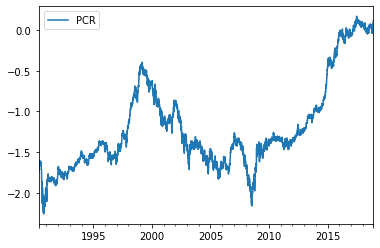

In [30]:
h.wrangled_data.plot()

## Oil Future

In [50]:
df = pd.read_pickle('raw_data/futures_data/CL_ohlcv.pkl')
df = df[['Settle']].reset_index()
df['Expiration'] = df['Expiration'].astype('datetime64[ns]')
df['Date'] = df['Date'].astype('datetime64[ns]')
df.shape

(300831, 3)

In [52]:
df['days_exp'] = (df['Expiration'] - df['Date']).apply(lambda x: x.days)

In [53]:
df.head()

,Expiration,Date,Settle,days_exp
0,1988-01-15,1987-01-16,17.15,364
1,1988-01-15,1987-01-19,17.50,361
2,1988-01-15,1987-01-20,17.76,360
3,1988-01-15,1987-01-21,17.98,359
4,1988-01-15,1987-01-22,18.05,358


In [56]:
df['days_exp'].describe()

count    300831.000000
mean        818.146554
std         628.179443
min          23.000000
25%         322.000000
50%         654.000000
75%        1199.000000
max        3315.000000
Name: days_exp, dtype: float64

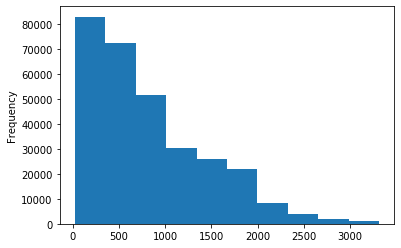

In [58]:
df['days_exp'].plot.hist()
plt.show()

In [63]:
df['months'] = np.ceil(df['days_exp'] / 365 * 12)

In [66]:
df.head()

,Expiration,Date,Settle,days_exp,months
0,1988-01-15,1987-01-16,17.15,364,12.0
1,1988-01-15,1987-01-19,17.50,361,12.0
2,1988-01-15,1987-01-20,17.76,360,12.0
3,1988-01-15,1987-01-21,17.98,359,12.0
4,1988-01-15,1987-01-22,18.05,358,12.0


In [72]:
df_unique = df.groupby(['Date', 'months'])[['Settle']].first()

In [77]:
df_by_month = df_unique.reset_index().pivot(columns='months', index='Date', values='Settle')

In [83]:
df_14 = df_by_month[[1, 4]].dropna()

In [91]:
df_res = pd.DataFrame(np.log(df_14[1] / df_14[4].shift(90)).dropna(), columns=['PCR'])

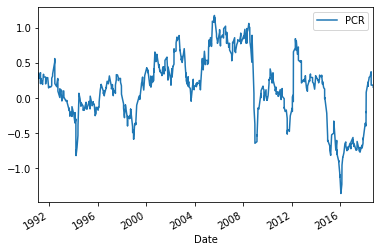

In [92]:
df_res.plot()

### Short Interest

In [105]:
df = pd.read_csv('raw_data/si/Short_Interest.csv', parse_dates=['Date'], index_col='Date').sort_index()
df.head()

,ShortVolume,ShortExemptVolume,TotalVolume
Date,,,
2013-04-01,8999083.0,3500.0,19236479.0
2013-04-02,11594335.0,6600.0,20941375.0
2013-04-03,18963769.0,13418.0,28373894.0
2013-04-04,12955093.0,7586.0,19966113.0
2013-04-05,14361164.0,0.0,28150360.0


In [110]:
pd.DataFrame((df['ShortVolume'] / df.rolling(30)['TotalVolume'].mean()).dropna(), columns=['SI'])

,SI
Date,
2013-05-10,0.569264
2013-05-13,0.388347
2013-05-14,0.474221
2013-05-15,0.629103
2013-05-16,0.503742
...,...
2018-11-19,0.420897
2018-11-20,0.839199
2018-11-21,0.335224
